In [1]:
import sys
sys.path.append('../src')

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from pathlib import Path
from load import load_train_data

pd.set_option('display.max_columns', None)

In [2]:
# Load data
train_data = load_train_data(local=True)
train_data.shape

(260601, 39)

In [3]:
# Filter dataset
cols_building_type = [col for col in train_data.columns if 'type' in col]
building_type = train_data[cols_building_type].copy()
building_type.head()

,foundation_type,roof_type,ground_floor_type,other_floor_type
building_id,,,,
802906,r,n,f,q
28830,r,n,x,q
94947,r,n,f,x
590882,r,n,f,x
201944,r,n,f,x


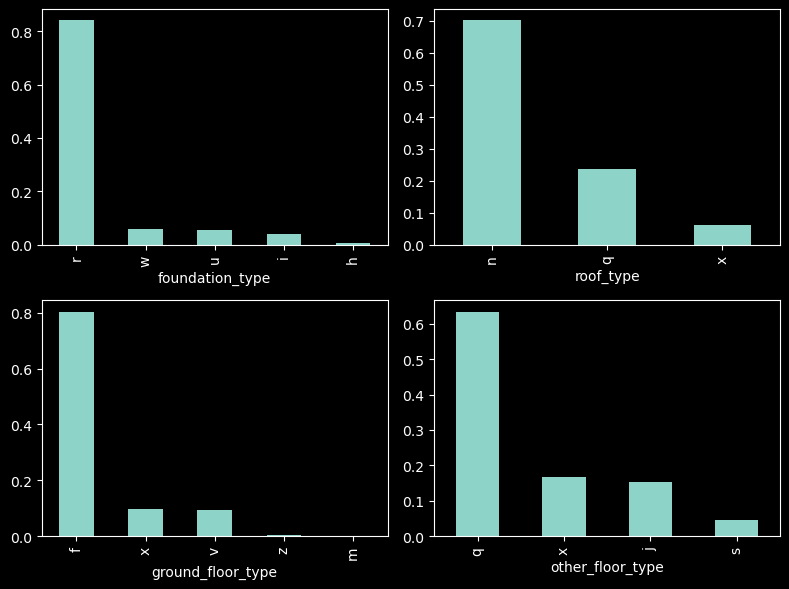

In [4]:
# Plot the distribution of building characteristics
fig, axs = plt.subplots(2, 2, figsize=(8, 6), tight_layout=True)

for i, col in enumerate(cols_building_type):
    building_type[col].value_counts(normalize=True).plot(kind='bar', ax=axs.flatten()[i])

In [5]:
# Calculate how many unique combinations of building type
building_type['all_type'] = building_type.sum(axis=1)
building_type['all_type'].nunique()

227

In [8]:
treshold = 0.01
all_type_percent = building_type['all_type'].value_counts(normalize=True).head(20)
all_type_percent[all_type_percent > treshold]

all_type
rnfq    0.388053
rqfq    0.138894
rnfx    0.095667
rnfj    0.072103
rnxq    0.037440
rqfx    0.024858
ixvs    0.024394
rqxq    0.015721
wqfq    0.012153
rnxx    0.011907
wnfq    0.011301
wnfj    0.010192
ixvj    0.010176
Name: proportion, dtype: float64

In [9]:
all_type_percent[all_type_percent > treshold].cumsum().iloc[-1]

0.8528593520362545